<a href="https://colab.research.google.com/github/jjadeb/Covid_Visualization_With_API/blob/main/Vis_Covid_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using an API to Visualize Covid Cases in Canada

I recently caught Covid and spent my sick-time going through a course called 'Using Python to Access Web Data.' In this course I was introduced to API's and wanted to try it out for myself, as well as explore python's visualization tools. It felt fitting to work with Canadian covid data. Enjoy!

### Credits
**API**
<br>Built by: Kyle Redelinghuys
<br>Website: https://covid19api.com/
<br>
<br>
**Data**
<br> Sourced from: COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University
<br>Github: https://github.com/CSSEGISandData/COVID-19 
<br>
<br>
**Coursera Course: Using Python to Access Web Data**
<br>Published by: University of Michigan
<br>Course link: https://www.coursera.org/learn/python-network-data

### Retrieving the Data

First, I'll import the packages I need.

In [2]:
#Import statements

import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from scipy.signal import savgol_filter

Now, time to request and retrieve the data. The `request` and `json` packages make this process fairly simple.

In [3]:
#Setting up for request
url = "https://api.covid19api.com/dayone/country/canada/status/confirmed/live"

payload={}
headers = {}

#Request/response
response = requests.request("GET", url, headers=headers, data=payload)

info = json.loads(response.text)

#Assigning data to lists
cases = []
dates = []

for item in info:
    cases.append(item['Cases'])
    dates.append(parse(item['Date']))


There is a rate limit on how many requests can be made. The following code prints out how many requests are left for the current time period. 

In [4]:
#Printing remaining requests in time frame

headers = response.headers
rate_limit_remaining = headers['X-Ratelimit-Remaining']
print("Requests remaining in timeframe:", rate_limit_remaining)

Requests remaining in timeframe: 9


### Cleaning the Data

Next, I'll create a dataframe with the retrieved covid data.

In [5]:
#Dataframe for dates vs cases

data = {'Date':dates, 'Cases':cases}
df = pd.DataFrame(data)

We can see below that the oldest data is when the very first covid cases popped up in Canada. It's also worth noting that the cases are cumulative.

In [6]:
#Print head
df.head()

,Date,Cases
0,2020-01-23 00:00:00+00:00,2
1,2020-01-24 00:00:00+00:00,3
2,2020-01-25 00:00:00+00:00,3
3,2020-01-26 00:00:00+00:00,3
4,2020-01-27 00:00:00+00:00,3


The following data shows the most recent cumulative number of cases in Canada.

In [7]:
#Print tail
df.tail()

,Date,Cases
1066,2022-12-24 00:00:00+00:00,3875356
1067,2022-12-25 00:00:00+00:00,3875356
1068,2022-12-26 00:00:00+00:00,3877068
1069,2022-12-27 00:00:00+00:00,3877836
1070,2022-12-28 00:00:00+00:00,3878788


I'd rather work with daily cases so I'll replace the `Cases` column with `Daily_Cases`.

In [8]:
#Cases non-cumulative
df['Lag'] = df.Cases.shift(1).fillna(0)

df['Daily_Cases'] = df.Cases - df.Lag
df['Daily_Cases'] = df['Daily_Cases'].astype('int')

df['Cumulative_Cases'] = df['Cases']

df = df.drop(columns = ['Cases', 'Lag'])

df.head()

,Date,Daily_Cases,Cumulative_Cases
0,2020-01-23 00:00:00+00:00,2,2
1,2020-01-24 00:00:00+00:00,1,3
2,2020-01-25 00:00:00+00:00,0,3
3,2020-01-26 00:00:00+00:00,0,3
4,2020-01-27 00:00:00+00:00,0,3


### Visualizing the Data

After a lot of tinkering and exploring the `pandas` package, I've created a figure plotting the all-time Canadian daily Covid cases.

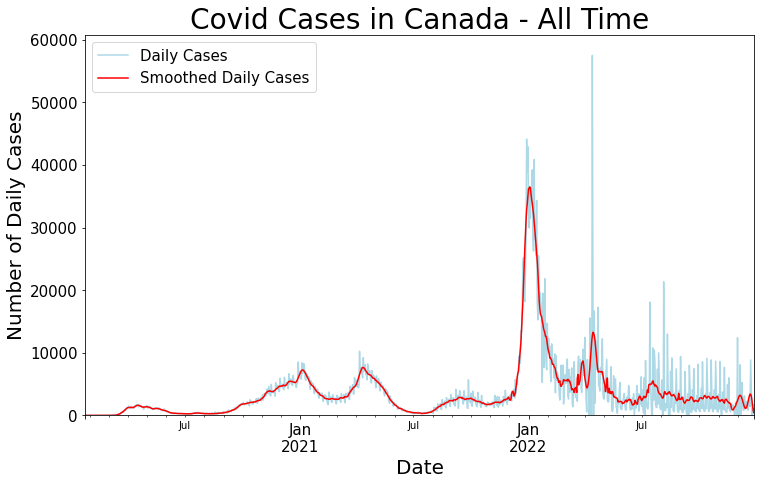

In [15]:
#Plot all daily cases vs time

df['Smoothed_Daily_Cases'] = savgol_filter(df['Daily_Cases'], 51, 10)

f_style = 'DejaVu Sans'
axis_size = 20
title_size = 28
tick_size = 15

df.plot(x = 'Date', y = ['Daily_Cases', 'Smoothed_Daily_Cases'], color = ['lightblue','red'], figsize=(12,7))

plt.xlabel("Date", fontsize = axis_size, fontweight = 'light', fontname = f_style);
plt.ylabel("Number of Daily Cases", fontsize = axis_size, fontweight = 'light', fontname = f_style);
plt.title("Covid Cases in Canada - All Time", fontsize = title_size, fontweight = 'light', fontname = f_style)
plt.ylim(0)
plt.xticks(fontsize=tick_size, fontweight = 'normal', fontname = f_style)
plt.yticks(fontsize=tick_size, fontweight = 'normal', fontname = f_style)
plt.legend(['Daily Cases', 'Smoothed Daily Cases'], fontsize = tick_size)

Some of the data seems strange, such as the large daily case spike between January and July of 2022. This could be due to many days of cases being reported in one day. Overall, it's quite facinating ot see the fluctuations in cases as well as the spikes around January in 2021 and 2022.

I also created a graph that looks at more recent data collected in the past six months.

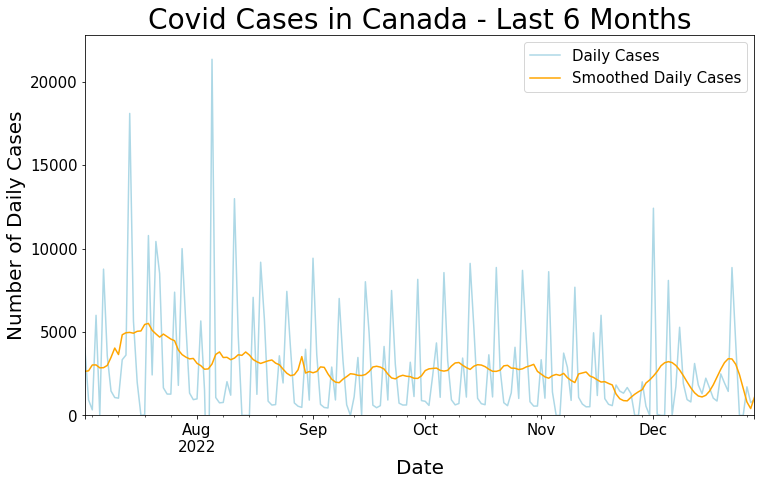

In [14]:
#Last 6 Months of Daily casses

last_5_months_df = df.tail(180)


f_style = 'DejaVu Sans'
axis_size = 20
title_size = 28
tick_size = 15

last_5_months_df.plot(x = 'Date', y = ['Daily_Cases', 'Smoothed_Daily_Cases'], color = ['lightblue','orange'], figsize=(12,7))

plt.xlabel("Date", fontsize = axis_size, fontweight = 'light', fontname = f_style);
plt.ylabel("Number of Daily Cases", fontsize = axis_size, fontweight = 'light', fontname = f_style);
plt.title("Covid Cases in Canada - Last 6 Months", fontsize = title_size, fontweight = 'light', fontname = f_style)
plt.ylim(0)
plt.xticks(fontsize=tick_size, fontweight = 'normal', fontname = f_style)
plt.yticks(fontsize=tick_size, fontweight = 'normal', fontname = f_style)
plt.legend(['Daily Cases', 'Smoothed Daily Cases'], fontsize = tick_size)

Here the smoothed line is the most important as data is reported on a week basis, rather than a daily one. 

### Conclusion

Overall it has been neat to replicate (to some degree) the graphs I would check every day a few years ago. Working with live data has also been a real treat and I'm excited to see how different these visualizations look a year from now.